In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

https://www.kaggle.com/datasets/mirichoi0218/insurance/download?datasetVersionNumber=1

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df['sex'] = df['sex'].replace({'female': 0, 'male' : 1})

In [4]:
df['smoker'] = df['smoker'].replace({'yes':0, 'no':1})

In [5]:
df['region'].value_counts()
df['region'] = df['region'].replace({'southeast': 1,'southwest': 2,'northwest': 3,'northeast': 4})

southeast <- 1

southwest <- 2

northwest <- 3

northeast <- 4

---

FEMALE <- 0

MALE <- 1

#### colunas

idade: idade do beneficiário principal

sexo: contratante de seguro gênero, feminino, masculino

IMC: Índice de massa corporal

filhos: Número de filhos cobertos pelo seguro de saúde / Número de dependentes

fumante: Fumar

região: a área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.

Encargos: Custos médicos individuais cobrados pelo seguro de saúde

In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,2.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [8]:
X = df.drop(columns=['charges'], axis=1)
y = df['charges'].values.reshape(-1,1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Com uma dimensão

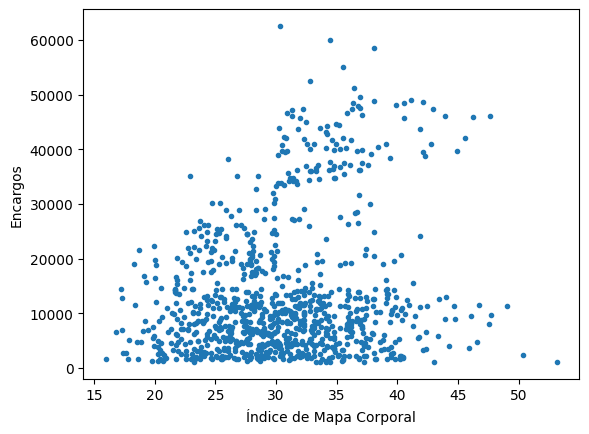

In [10]:
plt.scatter(X_train['bmi'], y_train, s=9)
plt.xlabel('Índice de Mapa Corporal')
plt.ylabel('Encargos')
plt.show()

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train['bmi'].values.reshape(-1,1), y_train)
y_pred_bi = model.predict(X_test['bmi'].values.reshape(-1,1))

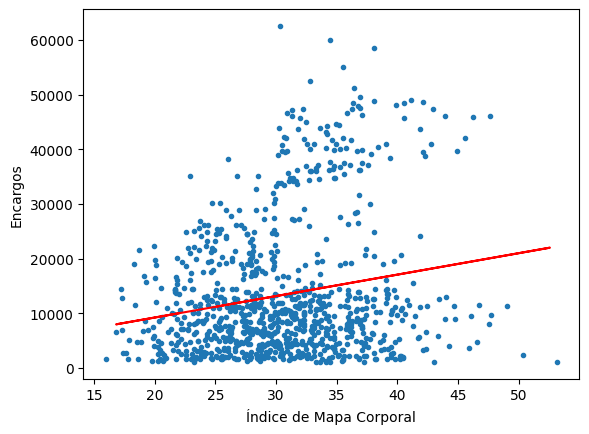

In [13]:
plt.scatter(X_train['bmi'], y_train, s=9)

plt.plot(X_test['bmi'], y_pred_bi, color='red')

plt.xlabel('Índice de Mapa Corporal')
plt.ylabel('Encargos')
plt.show()

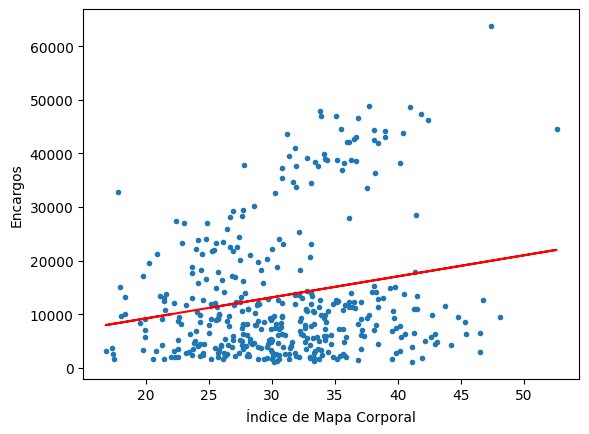

In [14]:
plt.scatter(X_test['bmi'], y_test, s=9)

plt.plot(X_test['bmi'], y_pred_bi, color='red')

plt.xlabel('Índice de Mapa Corporal')
plt.ylabel('Encargos')
plt.show()

In [15]:
accuracy_bi = r2_score(y_test, y_pred_bi)
accuracy_bi

0.04190370879961658

# Visão Multidimensional

### Matriz de dispersão:

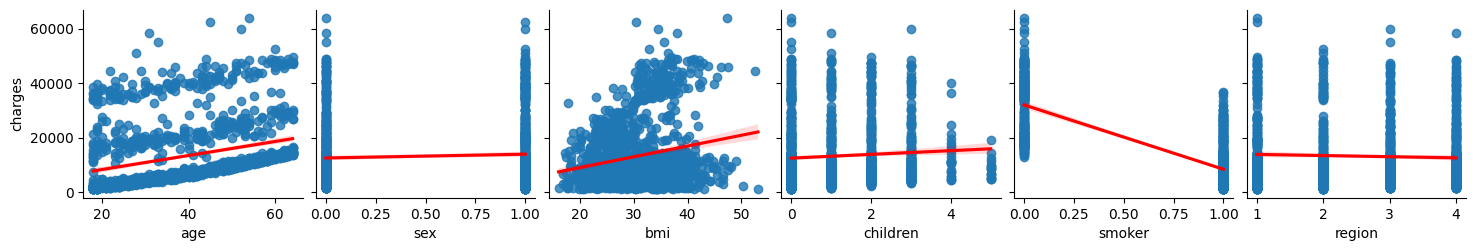

In [16]:
import seaborn as sns
colunas = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

sns.pairplot(df, x_vars=colunas, y_vars='charges', kind='reg', plot_kws={'line_kws': {'color': 'red'}})


### Gráficos de superfície:

Text(0.5, 0, 'Charges')

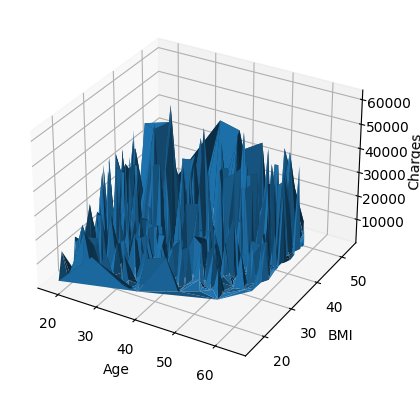

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X_train['age'], X_train['bmi'], np.squeeze(y_train), linewidth=0.2)
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')


### Gráfico de dispersão com múltiplas variáveis

Text(0, 0.5, 'Charges')

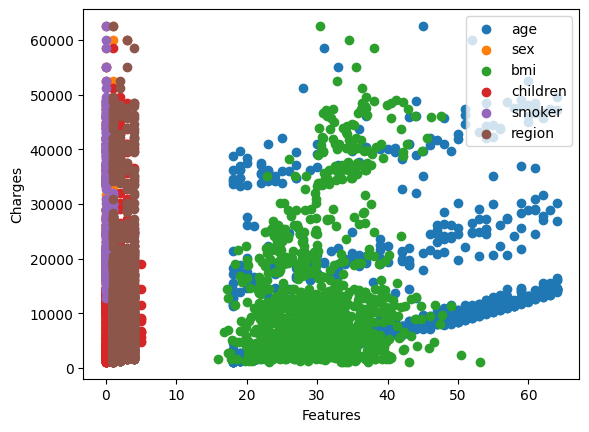

In [18]:
for col in colunas:
    plt.scatter(X_train[col], y_train, label=col)
plt.legend()
plt.xlabel('Features')
plt.ylabel('Charges')


---

# Usando duas colunas

In [19]:
model.fit(X_train[['bmi', 'age']], y_train)

LinearRegression()

In [20]:
y_pred_bi = model.predict(X_test[['bmi', 'age']])

In [21]:
accuracy = r2_score(y_test, y_pred_bi)
accuracy

0.13135244833400728

---
# PREDIÇÃO COM TODAS AS VARIÁVEIS

In [22]:
X_train.head(1)

,age,sex,bmi,children,smoker,region
332,61,0,31.16,0,1,3


In [23]:
exemplo = pd.DataFrame([{'age': 45, 'sex': 0, 'bmi': 34, 'children': 2, 'smoker': 1, 'region': 1}])
exemplo

,age,sex,bmi,children,smoker,region
0,45,0,34,2,1,1


In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
previsao_exemplo = model.predict(exemplo)
previsao_exemplo

array([[11003.19603368]])

In [27]:
accuracy = r2_score(y_test, y_pred)
accuracy

0.7696664826283285